1.) Once again, read in the file '2002FemPreg.csv'. Strip any whitespace from the column names. 

In [3]:
#insert 1
import pandas as pd
preg = pd.read_csv('data/2002FemPreg.csv', index_col = 0)
preg.columns = preg.columns.str.strip()
preg.shape

(13593, 244)

2.) Reduce the dataframe to only contain data on live births (meaning the preg.outcome == 1).

In [2]:
live = preg[preg.outcome == 1]
live.shape

(9148, 244)

3.) Find the attribute that represents the mother's age. What is it called? What index is it in?

In [3]:
#insert 3
for i, column in enumerate(live.columns):
    if "age" in column:
        print(column,i)
        
#agepreg 161        

ageatend 15
hpageend 16
kidage 40
hpagelb 41
lastage 67
ageqtnur_n 77
ageqtnur_p 78
ageqtnur 79
lastage2 85
ageqtnur_n2 95
ageqtnur_p2 96
ageqtnur2 97
lastage3 103
ageqtnur_n3 113
ageqtnur_p3 114
ageqtnur3 115
agepreg 161
agecon 163
ager 179
agescrn 180
agepreg_i 203
agecon_i 205
ager_i 220


4.) Reduce the data frame further to consider data for only non-null birthwgt_lb and mother's age values.

In [16]:
#insert 4
live = live.dropna(subset = ['birthwgt_lb', 'agepreg'])
live.shape

(9084, 244)

5.) Update the mother's age column so that the ages are no longer decimals but rounded down integers. Meaning, if the woman's age is saved as 47.8, then re-save it as 47. Hint: recast the column data type as an integer.

In [5]:
#insert 5
live['agepreg'] = live['agepreg'].astype(int)

6.) Make a histogram of the womens' ages. Label axes and give a title.

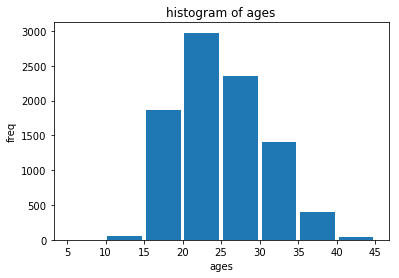

In [6]:
#insert 6
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

live['agepreg'].plot.hist(rwidth=.9, bins=np.arange(5,50,5))
plt.xlabel('ages')
plt.ylabel('freq')
plt.title('histogram of ages')

In [17]:
live['agepreg'].quantile(0.25)

20.5

7.) Create a frequency chart in descending order of age frequency.

In [7]:
#insert 7
live['agepreg'].value_counts()

21    641
20    632
23    590
24    560
19    558
22    552
18    541
26    514
25    509
27    486
28    444
17    397
30    394
29    393
31    338
32    277
16    237
33    219
34    171
35    136
15    127
36     99
37     83
38     54
14     43
39     34
40     20
13     14
41     13
10      2
42      2
11      1
12      1
44      1
43      1
Name: agepreg, dtype: int64

8.) Create a frequency chart in ascending order of age.

In [8]:
#insert 8
live['agepreg'].value_counts().sort_index()

10      2
11      1
12      1
13     14
14     43
15    127
16    237
17    397
18    541
19    558
20    632
21    641
22    552
23    590
24    560
25    509
26    514
27    486
28    444
29    393
30    394
31    338
32    277
33    219
34    171
35    136
36     99
37     83
38     54
39     34
40     20
41     13
42      2
43      1
44      1
Name: agepreg, dtype: int64

9.) How old was the youngest and oldest mother in the survey and how much did their baby weigh?

In [9]:
#insert 9
print(live['agepreg'].min())
print(live[live['agepreg'] == live['agepreg'].min()].birthwgt_lb)
print(live['agepreg'].max())
print(live[live['agepreg'] == live['agepreg'].max()].birthwgt_lb)

10
389      6.0
11508    8.0
Name: birthwgt_lb, dtype: float64
44
7932    6.0
Name: birthwgt_lb, dtype: float64


10.) What is the average woman's age? What is the woman's age in the 25th quartile? The 75th?

In [10]:
#insert 10
print(live['agepreg'].mean())
print(live['agepreg'].quantile(.25))
print(live['agepreg'].quantile(.75))

24.481285777190664
20.0
28.0


11.) Find the average birthweight for the mothers in the youngest quartile and in the oldest quartile. Might younger mothers tend to have heavier babies?

In [11]:
#insert 11
print(live[live['agepreg'] <= live['agepreg'].quantile(0.25)].birthwgt_lb.mean())
print(live[live['agepreg'] >= live['agepreg'].quantile(0.75)].birthwgt_lb.mean())

6.665883274578927
6.93505039193729


12.) Make a comparative histogram of baby weights for mothers in the youngest and oldest quartile.

2553 2679


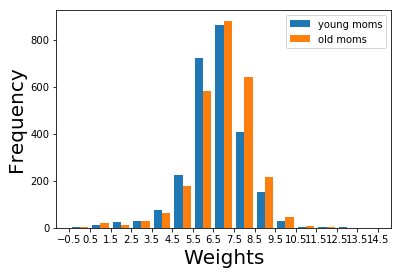

In [12]:
#insert 12
young = live[live['agepreg'] <= live['agepreg'].quantile(0.25)].birthwgt_lb
old = live[live['agepreg'] >= live['agepreg'].quantile(0.75)].birthwgt_lb
print(len(young), len(old))
plt.hist([young, old], np.arange(-.5, 15.5, 1), label=['young moms', 'old moms'])
plt.xlabel('Weights', size=20)
plt.ylabel('Frequency', size=20)
plt.xticks(np.arange(-.5, 15.5, 1))
plt.legend()
plt.show()

By the way, where did this large pregnancy dataset come from? I found it in a super amazing open resource, online Python statistics book called Think Stats. You should check out all of the modules here: http://greenteapress.com/thinkstats/

The dataset itself is obtained from the CDC's 2002 Cycle 6 National Survey of Family Growth questionnaire. You can read more about it here: https://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm